### Entrada de dados

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("Grafo_Entrada.csv", index_col=0, encoding = "ISO-8859-1")
data

,1,2,3,4,5,6,7,8
1,0,0,1,1,0,0,0,0
2,0,0,1,1,0,0,0,0
3,1,1,0,1,0,0,1,1
4,1,1,1,0,0,1,1,0
5,0,0,0,0,0,1,1,0
6,0,0,0,1,1,0,1,0
7,0,0,0,1,1,1,0,0
8,0,0,1,0,0,0,0,0


In [2]:
def csv_grafo(data):
    grafo = {}
    for i in data:
        vizinhos = []
        for j in range(1,len(data[i])+1):
            if data[str(i)][j] == 1:
                vizinhos.append(str(data.index[j-1]))
                
        #print("Estado: {} com {} estados vizinhos, que sao: {} \n".format(i,len(vizinhos),vizinhos))
        grafo[i] = vizinhos
    return grafo

In [3]:
import networkx as nx

def visualizacao(grafo):
    G = nx.Graph()
    # adicionando vertices

    for i in grafo:

        # Adicionando um novo vertice
        G.add_node(i)
        for j in grafo[i]:
            #Adicionando suas arestas
            G.add_edge(i, j)


    # total de vertices e arestas
    n_vertices = G.number_of_nodes()
    n_arestas = G.number_of_edges()

    #print('vertices: ', n_vertices, '\narestas: ', n_arestas)
    nx.spring_layout(G, k=0.15)
    nx.draw(G, with_labels=True)

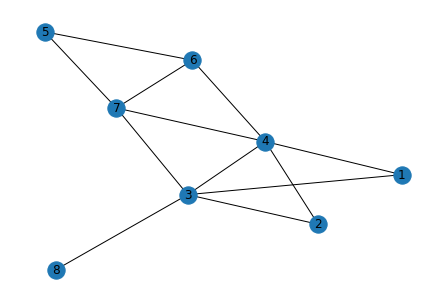

In [4]:
grafo = csv_grafo(data)
visualizacao(grafo)

### Funções

In [5]:
import networkx as nx
import random

#Desenhar o grafo baseado na entrada de um vertice
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [6]:
def arvore_profundidade(G,vertice,grafo,dict_vertices):
    if len(vertices) == 0:
        dict_vertices.append(vertice)
        G.add_node(vertice)
        
    for j in grafo[vertice]:
        if j not in dict_vertices:
            dict_vertices.append(j)

            G.add_edge(vertice, j)
            arvore_profundidade(G,j,grafo,dict_vertices)

    return G


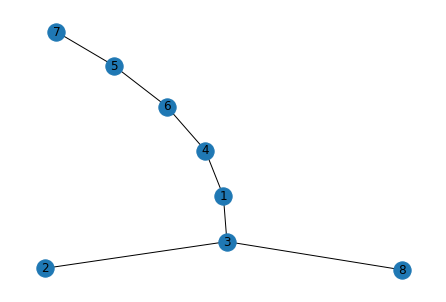

In [7]:
G = nx.Graph()
vertices = []
arvore_profundidade(G,'4',grafo,vertices)

nx.spring_layout(G, k=0.15)
nx.draw(G, with_labels=True)

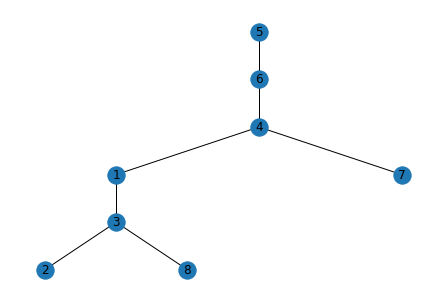

In [8]:
G = nx.Graph()
vertices = []
vertice_desejado = '5'

arvore_profundidade(G,vertice_desejado,grafo,vertices)

pos = hierarchy_pos(G,vertice_desejado)    
nx.draw(G, pos=pos, with_labels=True)